In [11]:
%matplotlib inline
%matplotlib notebook
from IPython.display import display
import ipywidgets as widgets
import seaborn as sns
from ipywidgets import interact
# from scripts.vis import draw
from py2neo import Node
import neo4jupyter
neo4jupyter.init_notebook_mode()
import py2neo
from py2neo import Graph
import os
import numpy as np
import glob
from os import listdir
from neo4j.v1 import GraphDatabase

<IPython.core.display.Javascript object>

In [3]:
#connect to graph database
my_graph = Graph('http://localhost:7474/')

In [4]:
ingredient_query="""MATCH (i:ingredient) return i.name limit 100"""
ingredient_list = list(my_graph.run(ingredient_query).data())
options = {"component": "name", "ingredient": "name"}
# options = {"component": "name", "ingredient": "name"}

In [ ]:
@interact(ingredient = ingredient_list)
def plot(ingredient):
    _ = neo4jupyter.draw(my_graph, options)

In [5]:
neo4jupyter.draw(my_graph, options)

In [9]:
button = widgets.Button(description="Click Me!")
display(button)

def on_button_clicked(b):
    print("Button clicked.")

button.on_click(on_button_clicked)

Button(description='Click Me!', style=ButtonStyle())

<IPython.core.display.Javascript object>


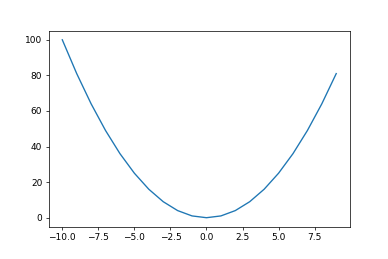

In [66]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10,10)
y = x**2

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y)


In [12]:

x = np.arange(-10,10)
y = x**2

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y)


coords = []

def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    print('x = %d, y = %d')%(ix, iy)

    global coords
    coords.append((ix, iy))

    if len(coords) == 2:
        fig.canvas.mpl_disconnect(cid)

    return coords
cid = fig.canvas.mpl_connect('button_press_event', onclick)

NameError: name 'plt' is not defined

In [60]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10,10)
y = x**2

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y)

def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    print('x = %d, y = %d'%(
        ix, iy))

    global coords
    coords = [ix, iy]

    return coords


for i in xrange(0,1):

    cid = fig.canvas.mpl_connect('button_press_event', onclick)


plt.show()


<IPython.core.display.Javascript object>

NameError: name 'xrange' is not defined

<IPython.core.display.Javascript object>


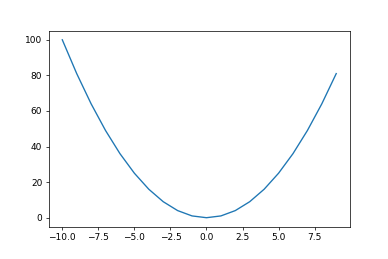

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz

def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

# Simple mouse click function to store coordinates
def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata

    # print 'x = %d, y = %d'%(
    #     ix, iy)

    # assign global variable to access outside of function
    global coords
    coords.append((ix, iy))

    # Disconnect after 2 clicks
    if len(coords) == 2:
        fig.canvas.mpl_disconnect(cid)
        plt.close(1)
    return


x = np.arange(-10,10)
y = x**2

fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(x,y)

coords = []

# Call click func
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

In [14]:
coords

[(6.1545400238948638, 39.511010760604989),
 (-2.9595579450418157, 5.1107164265358271)]

<IPython.core.display.Javascript object>


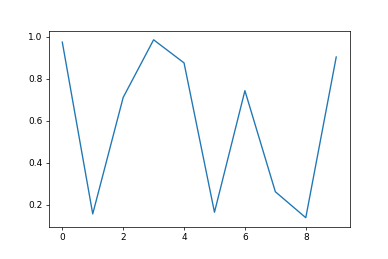

In [70]:
fig, ax = plt.subplots()
ax.plot(np.random.rand(10))

def onclick(event):
    print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          ('double' if event.dblclick else 'single', event.button,
           event.x, event.y, event.xdata, event.ydata))

cid = fig.canvas.mpl_connect('button_press_event', onclick)

<IPython.core.display.Javascript object>


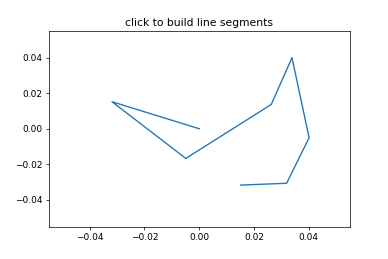

In [71]:
from matplotlib import pyplot as plt

class LineBuilder:
    def __init__(self, line):
        self.line = line
        self.xs = list(line.get_xdata())
        self.ys = list(line.get_ydata())
        self.cid = line.figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        print('click', event)
        if event.inaxes!=self.line.axes: return
        self.xs.append(event.xdata)
        self.ys.append(event.ydata)
        self.line.set_data(self.xs, self.ys)
        self.line.figure.canvas.draw()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('click to build line segments')
line, = ax.plot([0], [0])  # empty line
linebuilder = LineBuilder(line)

plt.show()